In [44]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
import numpy as np
from shapely.geometry import Polygon

import rawpy
import tqdm

In [17]:
path = "/Users/dsuo/Downloads/2021-01-19-0001.dng"
with rawpy.imread(path) as raw:
    rgb = raw.postprocess()

In [19]:
rgb.shape

(17600, 13600, 3)

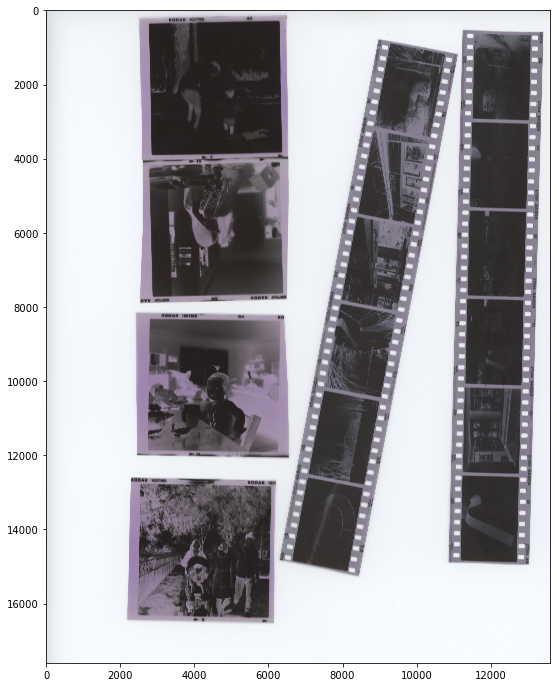

In [18]:
plt.figure(figsize=(16, 12))
plt.imshow(rgb)

In [169]:
bw = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

In [170]:
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

In [171]:
def PolyArea(x, y):
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

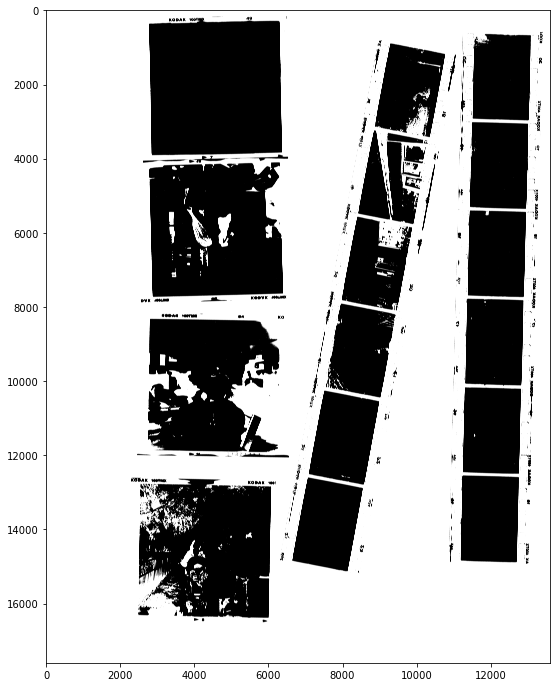

In [163]:
ret, thresh = cv2.threshold(bw, 115, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(16, 12))
plt.imshow(thresh, cmap="gray")

 26%|██▌       | 8377/32383 [00:00<00:00, 83750.71it/s]

3424294.0
3419810.0
3420805.0
3423888.0
3420571.0
3419652.0
3415729.5
3405016.5


100%|██████████| 32383/32383 [00:00<00:00, 52795.38it/s]


8


 31%|███       | 9685/31487 [00:00<00:00, 96781.33it/s]

poly!
poly!
poly!
poly!
poly!
poly!
poly!
poly!


100%|██████████| 31487/31487 [00:00<00:00, 52479.99it/s]


0


 41%|████      | 11895/29325 [00:00<00:00, 64267.92it/s]

poly!
poly!
poly!
poly!
poly!
poly!
poly!
3402564.0
poly!
3426192.0


100%|██████████| 29325/29325 [00:00<00:00, 44492.90it/s]


2


 32%|███▏      | 22451/70562 [00:00<00:00, 116557.19it/s]

poly!
poly!
3458915.0
poly!
poly!
poly!
3454334.0


100%|██████████| 70562/70562 [00:01<00:00, 38626.25it/s] 


2


100%|██████████| 54839/54839 [00:00<00:00, 60141.04it/s]


0


100%|██████████| 57826/57826 [00:01<00:00, 56317.20it/s] 


0


100%|██████████| 50608/50608 [00:00<00:00, 60573.13it/s] 


0


100%|██████████| 6048/6048 [00:00<00:00, 56079.95it/s]


0


100%|██████████| 2095/2095 [00:00<00:00, 44536.58it/s]


0


  0%|          | 0/2576 [00:00<?, ?it/s]

0


100%|██████████| 2576/2576 [00:00<00:00, 43069.09it/s]


0


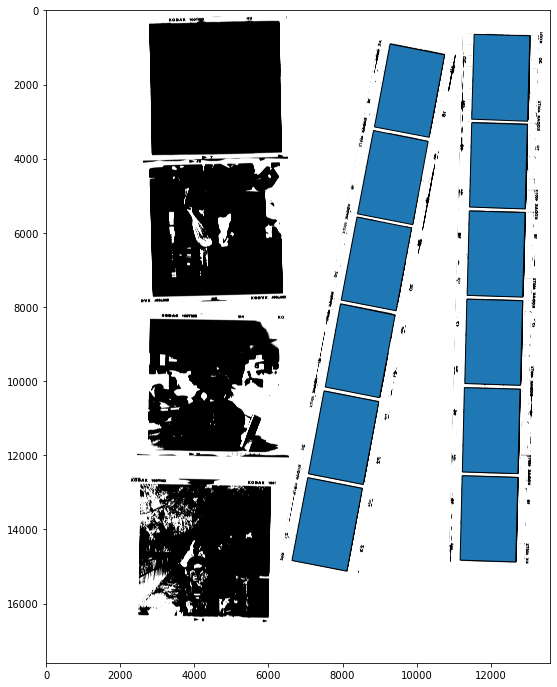

In [173]:
fig, ax = plt.subplots(figsize=(16, 12))
ax.imshow(thresh, cmap="gray")

polys = []
paths = []

for threshold in np.linspace(100, 200, 11):
    ret, im = cv2.threshold(bw, threshold, 255, cv2.THRESH_BINARY)
    cnts = cv2.findContours(im.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)
    
    found = 0
    for c in tqdm.tqdm(cnts):
        idxs = cv2.convexHull(c, returnPoints = False)
        hull = c[idxs.squeeze()]
        peri = cv2.arcLength(hull, True)
        approx = cv2.approxPolyDP(hull, 0.015 * peri, True)

        if len(approx) == 4:
            verts = approx.squeeze()
            area = PolyArea(verts[:,0], verts[:, 1])

            if area < 3400000 or area > 3500000:
                continue

            currPoly = Polygon(verts)
            exists = False
            for poly in polys:
                if poly.intersects(currPoly):
                    exists = True
                    print("poly!")
                    break

            if exists:
                continue

            print(area)
            polys.append(currPoly)

            verts = np.concatenate((verts, [verts[0]]))
            path = Path(verts, codes)
            patch = patches.PathPatch(path)
            ax.add_patch(patch)
            
            paths.append(path)

            found += 1
    print(found)